In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn_evaluation import plot
import loadData
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree._tree import TREE_LEAF
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import learning_curve
from sklearn import cross_validation
import timeit

In [82]:
# load data
training_set, testing_set = loadData.loadDataWithoutTestSet('processed.cleveland.data', split_to_test=True)
training_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cancerPresence
248,52.0,1.0,4.0,125.0,212.0,0.0,0.0,168.0,0.0,1.0,1.0,2.0,7.0,3
146,57.0,1.0,4.0,165.0,289.0,1.0,2.0,124.0,0.0,1.0,2.0,3.0,7.0,4
73,65.0,1.0,4.0,110.0,248.0,0.0,2.0,158.0,0.0,0.6,1.0,2.0,6.0,1
40,65.0,0.0,4.0,150.0,225.0,0.0,2.0,114.0,0.0,1.0,2.0,3.0,7.0,4
142,52.0,1.0,2.0,128.0,205.0,1.0,0.0,184.0,0.0,0.0,1.0,0.0,3.0,0


In [83]:
# get features and labels
training_set_labels = training_set.iloc[:,-1]
training_set = training_set.iloc[:,0:-1]

training_set_labels.reset_index(drop=True, inplace=True)
training_set.reset_index(drop=True, inplace=True)

testing_set_labels = testing_set.iloc[:,-1]
testing_set = testing_set.iloc[:,0:-1]

testing_set_labels.reset_index(drop=True, inplace=True)
testing_set.reset_index(drop=True, inplace=True)

print(training_set.shape)
print(testing_set.shape)

training_set.replace('?',0, inplace=True)
testing_set.replace('?',0, inplace=True)

training_set[['ca','thal']] = training_set[['ca','thal']].apply(pd.to_numeric)
testing_set[['ca','thal']] = testing_set[['ca','thal']].apply(pd.to_numeric)
target_names=['class 0', 'class 1', 'class 2', 'class 3', 'class 4']


(242, 13)
(61, 13)


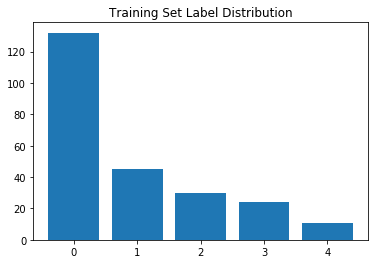

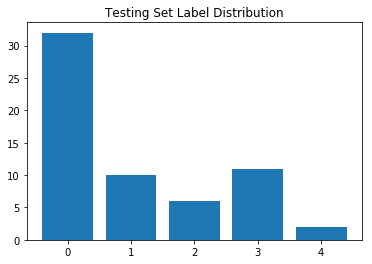

In [3]:
plt.bar(['0','1', '2', '3', '4'],[len(training_set_labels[training_set_labels==0]), 
         len(training_set_labels[training_set_labels==1]), 
             len(training_set_labels[training_set_labels==2]),
                len(training_set_labels[training_set_labels==3]),
                   len(training_set_labels[training_set_labels==4])])
plt.title('Training Set Label Distribution')
plt.savefig('dataset2_training_set_label_dist.png')
plt.show()
                 
plt.bar(['0','1', '2', '3', '4'],[len(testing_set_labels[testing_set_labels==0]), 
         len(testing_set_labels[testing_set_labels==1]), 
             len(testing_set_labels[testing_set_labels==2]),
                len(testing_set_labels[testing_set_labels==3]),
                   len(testing_set_labels[testing_set_labels==4])])
plt.title('Testing Set Label Distribution')
plt.savefig('dataset2_testing_set_label_dist.png')
plt.show()

In [4]:
# decision tree
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(training_set, training_set_labels)

predicted_training_set_labels = dtc.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = dtc.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

1.0
0.4426229508196721


In [5]:
# criterion = ['gini', 'entropy']
# splitter  = ['best','random']
# min_samples_split = [2, 3, 4]
# min_samples_leaf = [1, 2, 3, 4, 5]
# param_grid = dict(criterion = criterion, splitter = splitter, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
# grid_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid)
# grid_result_dtc = grid_dtc.fit(training_set, training_set_labels)


# print("Best: %f using %s" % (grid_result_dtc.best_score_, grid_result_dtc.best_params_))
# means = grid_result_dtc.cv_results_['mean_test_score']
# stds = grid_result_dtc.cv_results_['std_test_score']
# params = grid_result_dtc.cv_results_['params']
# results = zip(means, stds, params)
# for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
#     print("%f (%f) with: %r" % (mean, stdev, param))
    

# predicted_training_set_labels = grid_dtc.predict(training_set)
# predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
# training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

# predicted_testing_set_labels = grid_dtc.predict(testing_set)
# predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
# testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

# print(training_set_acc)
# print(testing_set_acc)

In [6]:
# target_names=['class 0', 'class 1', 'class 2', 'class 3', 'class 4']
# print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))

In [7]:
# ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
#                       subset={'criterion': 'entropy', 'splitter': 'random'})
# fig = ax.get_figure()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('dataset2_dtc1.png')
# fig.clf()
# ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
#                       subset={'criterion': 'gini', 'splitter': 'random'})
# fig = ax.get_figure()
# fig.savefig('dataset2_dtc2.png')
# fig.clf()
# ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
#                       subset={'criterion': 'entropy', 'splitter': 'best'})
# fig = ax.get_figure()
# fig.savefig('dataset2_dtc3.png')
# fig.clf()
# ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
#                       subset={'criterion': 'gini', 'splitter': 'best'})
# fig = ax.get_figure()
# fig.savefig('dataset2_dtc4.png')
# fig.clf()

In [8]:
# dtc = tree.DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
# dtc.fit(training_set, training_set_labels)
# dot_data = tree.export_graphviz(dtc, out_file='dataset2_tree.dot', feature_names=training_set.columns, 
#                                 filled=True, rounded=True)  
# graph = graphviz.Source(dot_data)
# from subprocess import check_call
# #check_call(['dot','-Tpng','dataset2_tree.dot','-o','dataset2_tree.png'])

In [9]:
# neural networks
nn = MLPClassifier()
nn.fit(training_set, training_set_labels)

predicted_training_set_labels = nn.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = nn.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

0.43388429752066116
0.4426229508196721


In [10]:
# alphas = [0.0001, 0.0002, 0.0005, 0.0007, 0.001, 0.002, 0.005, 0.01]
# learning_rates = [0.001, 0.002, 0.005, 0.007, 0.01]
# momentums = [0.9, 0.85, 0.8, 0.75, 0.7]
# param_grid = dict(alpha=alphas, learning_rate_init = learning_rates, momentum = momentums)
# grid_nn = GridSearchCV(estimator=nn, param_grid=param_grid)
# grid_result_nn = grid_nn.fit(training_set, training_set_labels)


# print("Best: %f using %s" % (grid_result_nn.best_score_, grid_result_nn.best_params_))
# means = grid_result_nn.cv_results_['mean_test_score']
# stds = grid_result_nn.cv_results_['std_test_score']
# params = grid_result_nn.cv_results_['params']
# results = zip(means, stds, params)
# for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
#     print("%f (%f) with: %r" % (mean, stdev, param))
    

# predicted_training_set_labels = grid_nn.predict(training_set)
# predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
# training_set_acc_nn=accuracy_score(training_set_labels, predicted_training_set_labels)

# predicted_testing_set_labels = grid_nn.predict(testing_set)
# predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
# testing_set_acc_nn=accuracy_score(testing_set_labels, predicted_testing_set_labels)

# print(training_set_acc_nn)
# print(testing_set_acc_nn)

In [11]:
# print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))

In [12]:
# ax = plot.grid_search(grid_nn.grid_scores_, change=('alpha', 'learning_rate_init'),
#               subset={'momentum': 0.85})
# fig = ax.get_figure()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('dataset2_NN1.png')
# fig.clf()
# ax = plot.grid_search(grid_nn.grid_scores_, change=('alpha', 'momentum'),
#               subset={'learning_rate_init': 0.005})
# fig = ax.get_figure()
# fig.savefig('dataset2_NN2.png')
# fig.clf()

In [13]:
# boosting
gbc = GradientBoostingClassifier()
gbc.fit(training_set, training_set_labels)

predicted_training_set_labels = gbc.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = gbc.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

1.0
0.5081967213114754


In [14]:
# nEstimators = [100, 300, 500, 700, 900]
# learning_rates = [0.1, 0.3, 0.5, 0.7, 1.0]
# param_grid = dict(learning_rate = learning_rates, n_estimators = nEstimators)
# grid_b = GridSearchCV(estimator=gbc, param_grid=param_grid)
# grid_result_b = grid_b.fit(training_set, training_set_labels)


# print("Best: %f using %s" % (grid_result_b.best_score_, grid_result_b.best_params_))
# means = grid_result_b.cv_results_['mean_test_score']
# stds = grid_result_b.cv_results_['std_test_score']
# params = grid_result_b.cv_results_['params']
# results = zip(means, stds, params)
# for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
#     print("%f (%f) with: %r" % (mean, stdev, param))
    
# predicted_training_set_labels = grid_b.predict(training_set)
# predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
# training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

# predicted_testing_set_labels = grid_b.predict(testing_set)
# predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
# testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

# print(training_set_acc)
# print(testing_set_acc)

In [15]:
# print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))

In [16]:
# ax = plot.grid_search(grid_b.grid_scores_, change=('learning_rate', 'n_estimators'))
# fig = ax.get_figure()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('dataset2_boosting1.png')
# fig.clf()

In [17]:
# KNN
knn = KNeighborsClassifier()
knn.fit(training_set, training_set_labels)

predicted_training_set_labels = knn.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = knn.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

0.6239669421487604
0.47540983606557374


In [18]:
# n_neighbors = [5, 6, 7, 8, 9, 10]
# weights = ["uniform", "distance"]
# p = [1, 2, 3, 4]
# param_grid = dict(n_neighbors = n_neighbors, weights = weights, p = p)
# grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid)
# grid_result_knn = grid_knn.fit(training_set, training_set_labels)


# print("Best: %f using %s" % (grid_result_knn.best_score_, grid_result_knn.best_params_))
# means = grid_result_knn.cv_results_['mean_test_score']
# stds = grid_result_knn.cv_results_['std_test_score']
# params = grid_result_knn.cv_results_['params']
# results = zip(means, stds, params)
# for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
#     print("%f (%f) with: %r" % (mean, stdev, param))
    

# predicted_training_set_labels = grid_knn.predict(training_set)
# predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
# training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

# predicted_testing_set_labels = grid_knn.predict(testing_set)
# predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
# testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

# print(training_set_acc)
# print(testing_set_acc)

In [19]:
# print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))

In [20]:
# ax = plot.grid_search(grid_knn.grid_scores_, change=('n_neighbors', 'p'), subset={'weights': 'uniform'})
# fig = ax.get_figure()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('dataset2_knn1.png')
# fig.clf()
# ax = plot.grid_search(grid_knn.grid_scores_, change=('n_neighbors', 'p'), subset={'weights': 'distance'})
# fig = ax.get_figure()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('dataset2_knn2.png')
# fig.clf()

In [21]:
# SVM
svm_c = svm.SVC()
svm_c.fit(training_set, training_set_labels)

predicted_training_set_labels = svm_c.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = svm_c.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

1.0
0.5245901639344263


In [22]:
# C_range = 10. ** np.arange(-3, 8)
# gamma_range = 10. ** np.arange(-5, 4)
# param_grid = dict(C = C_range, gamma = gamma_range)
# grid_svc = GridSearchCV(estimator=svm_c, param_grid=param_grid)
# grid_result_svc = grid_svc.fit(training_set, training_set_labels)


# print("Best: %f using %s" % (grid_result_svc.best_score_, grid_result_svc.best_params_))
# means = grid_result_svc.cv_results_['mean_test_score']
# stds = grid_result_svc.cv_results_['std_test_score']
# params = grid_result_svc.cv_results_['params']
# results = zip(means, stds, params)
# for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
#     print("%f (%f) with: %r" % (mean, stdev, param))
    

# predicted_training_set_labels = grid_svc.predict(training_set)
# predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
# training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

# predicted_testing_set_labels = grid_svc.predict(testing_set)
# predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
# testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

# print(training_set_acc)
# print(testing_set_acc)

In [23]:
# print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))

In [24]:
# ax = plot.grid_search(grid_svc.grid_scores_, change=('C', 'gamma'))
# fig = ax.get_figure()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('dataset2_svm.png')
# fig.clf()

In [25]:
# linear_svc=svm.LinearSVC()
# C_range = 10. ** np.arange(-3, 8)

# param_grid = dict(C = C_range)
# grid_linear_svc = GridSearchCV(estimator=linear_svc, param_grid=param_grid)
# grid_result_linear_svc = grid_linear_svc.fit(training_set, training_set_labels)


# print("Best: %f using %s" % (grid_result_linear_svc.best_score_, grid_result_linear_svc.best_params_))
# means = grid_result_linear_svc.cv_results_['mean_test_score']
# stds = grid_result_linear_svc.cv_results_['std_test_score']
# params = grid_result_linear_svc.cv_results_['params']
# results = zip(means, stds, params)
# for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
#     print("%f (%f) with: %r" % (mean, stdev, param))
    

# predicted_training_set_labels = grid_result_linear_svc.predict(training_set)
# predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
# training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

# predicted_testing_set_labels = grid_result_linear_svc.predict(testing_set)
# predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
# testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

# print(training_set_acc)
# print(testing_set_acc)

In [26]:
# print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))

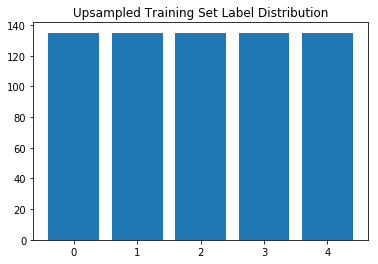

In [27]:
# upsampling data
training_set2, testing_set2 = loadData.loadDataWithoutTestSet('processed.cleveland.data', split_to_test=True)
class_0 = training_set2[training_set2['cancerPresence']==0]
num=len(class_0)
class_1 = training_set2[training_set2['cancerPresence']==1]
class_2 = training_set2[training_set2['cancerPresence']==2]
class_3 = training_set2[training_set2['cancerPresence']==3]
class_4 = training_set2[training_set2['cancerPresence']==4]
class_1_upsampled = resample(class_1, 
                                 replace=True,   
                                 n_samples=num,   
                                 random_state=123)
class_2_upsampled = resample(class_2, 
                                 replace=True,   
                                 n_samples=num,   
                                 random_state=123)
class_3_upsampled = resample(class_3, 
                                 replace=True,   
                                 n_samples=num,   
                                 random_state=123)
class_4_upsampled = resample(class_4, 
                                 replace=True,   
                                 n_samples=num,   
                                 random_state=123)
training_set_upsampled=pd.concat([class_0, class_1_upsampled, class_2_upsampled, class_3_upsampled, class_4_upsampled])
training_set_upsampled_labels = training_set_upsampled.iloc[:,-1]
training_set_upsampled = training_set_upsampled.iloc[:,0:-1]

training_set_upsampled_labels.reset_index(drop=True, inplace=True)
training_set_upsampled.reset_index(drop=True, inplace=True)
training_set_upsampled.replace('?',0, inplace=True)

training_set_upsampled[['ca','thal']] = training_set_upsampled[['ca','thal']].apply(pd.to_numeric)


plt.bar(['0','1', '2', '3', '4'],[len(training_set_upsampled_labels[training_set_upsampled_labels==0]), 
         len(training_set_upsampled_labels[training_set_upsampled_labels==1]), 
             len(training_set_upsampled_labels[training_set_upsampled_labels==2]),
                len(training_set_upsampled_labels[training_set_upsampled_labels==3]),
                   len(training_set_upsampled_labels[training_set_upsampled_labels==4])])
plt.title('Upsampled Training Set Label Distribution')
plt.show()

metrics=[]

In [28]:
criterion = ['gini', 'entropy']
splitter  = ['best','random']
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3, 4, 5]
param_grid = dict(criterion = criterion, splitter = splitter, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
grid_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid)
grid_result_dtc = grid_dtc.fit(training_set_upsampled, training_set_upsampled_labels)


print("Best: %f using %s" % (grid_result_dtc.best_score_, grid_result_dtc.best_params_))
means = grid_result_dtc.cv_results_['mean_test_score']
stds = grid_result_dtc.cv_results_['std_test_score']
params = grid_result_dtc.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))

predicted_testing_set_labels = grid_dtc.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)


Best: 0.902222 using {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.902222 (0.035740) with: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.900741 (0.017149) with: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.894815 (0.017901) with: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.894815 (0.031705) with: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.891852 (0.014666) with: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}
0.890370 (0.030216) with: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.885926 (0.034299) with: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
0.882963 (0.005543) with: {'criterion': 'entropy', 'min_sample

In [29]:
ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
                      subset={'criterion': 'entropy', 'splitter': 'random'})
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_dtc1.png')
fig.clf()
ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
                      subset={'criterion': 'gini', 'splitter': 'random'})
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_dtc2.png')
fig.clf()
ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
                      subset={'criterion': 'entropy', 'splitter': 'best'})
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_dtc3.png')
fig.clf()
ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
                      subset={'criterion': 'gini', 'splitter': 'best'})
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_dtc4.png')
fig.clf()

c:\users\tommy\.virtualenvs\assignment1-ocs3pq-h\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
c:\users\tommy\.virtualenvs\assignment1-ocs3pq-h\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
c:\users\tommy\.virtualenvs\assignment1-ocs3pq-h\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
c:\users\tommy\.virtualenvs\assignment1-

<Figure size 720x576 with 0 Axes>

In [30]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))
metrics.append(precision_recall_fscore_support(testing_set_labels, predicted_testing_set_labels, average='weighted'))

             precision    recall  f1-score   support

    class 0       0.94      0.94      0.94        32
    class 1       0.82      0.90      0.86        10
    class 2       1.00      0.83      0.91         6
    class 3       0.85      1.00      0.92        11
    class 4       0.00      0.00      0.00         2

avg / total       0.88      0.90      0.89        61



c:\users\tommy\.virtualenvs\assignment1-ocs3pq-h\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
cv = cross_validation.ShuffleSplit(training_set_upsampled.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
cv = 5
estimator = tree.DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
train_sizes = np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        estimator, training_set_upsampled, training_set_upsampled_labels, cv=cv, n_jobs=1, train_sizes=train_sizes, shuffle=True)
plot.learning_curve(train_scores, test_scores, train_sizes)
plt.savefig('dataset2_dtcLearningCurve.png')
plt.clf()
plt.show()

<Figure size 432x288 with 0 Axes>

In [101]:
training_times=[]
testing_times=[]
start_time = timeit.default_timer()
estimator = tree.DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
estimator.fit(training_set_upsampled,training_set_upsampled_labels)
end_time = timeit.default_timer()
elapsed = end_time - start_time
training_times.append(elapsed*1000)
print(elapsed*1000, 'milleseconds')
start_time = timeit.default_timer()
estimator.predict(testing_set)
end_time = timeit.default_timer()
elapsed = end_time - start_time
print(elapsed*1000, 'milleseconds')
testing_times.append(elapsed*1000)

1.5804200913294153 milleseconds
0.35273059359042236 milleseconds


In [95]:
dtc = tree.DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
dtc.fit(training_set, training_set_labels)
dot_data = tree.export_graphviz(dtc, out_file='dataset2_tree.dot', feature_names=training_set.columns, 
                                filled=True, rounded=True)  
graph = graphviz.Source(dot_data)
from subprocess import check_call
check_call(['dot','-Tpng','dataset2_tree.dot','-o','dataset2_tree.png'])

0

In [96]:
C_range = 10. ** np.arange(-3, 8)
gamma_range = 10. ** np.arange(-5, 4)
param_grid = dict(C = C_range, gamma = gamma_range)
grid_svc = GridSearchCV(estimator=svm_c, param_grid=param_grid)
grid_result_svc = grid_svc.fit(training_set_upsampled, training_set_upsampled_labels)


print("Best: %f using %s" % (grid_result_svc.best_score_, grid_result_svc.best_params_))
means = grid_result_svc.cv_results_['mean_test_score']
stds = grid_result_svc.cv_results_['std_test_score']
params = grid_result_svc.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
predicted_testing_set_labels = grid_svc.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)


Best: 0.951111 using {'C': 1.0, 'gamma': 0.1}
0.951111 (0.021773) with: {'C': 1.0, 'gamma': 0.1}
0.951111 (0.021773) with: {'C': 1.0, 'gamma': 1.0}
0.951111 (0.021773) with: {'C': 1.0, 'gamma': 10.0}
0.951111 (0.021773) with: {'C': 1.0, 'gamma': 100.0}
0.951111 (0.021773) with: {'C': 1.0, 'gamma': 1000.0}
0.951111 (0.021773) with: {'C': 10.0, 'gamma': 0.1}
0.951111 (0.021773) with: {'C': 10.0, 'gamma': 1.0}
0.951111 (0.021773) with: {'C': 10.0, 'gamma': 10.0}
0.951111 (0.021773) with: {'C': 10.0, 'gamma': 100.0}
0.951111 (0.021773) with: {'C': 10.0, 'gamma': 1000.0}
0.951111 (0.021773) with: {'C': 100.0, 'gamma': 0.1}
0.951111 (0.021773) with: {'C': 100.0, 'gamma': 1.0}
0.951111 (0.021773) with: {'C': 100.0, 'gamma': 10.0}
0.951111 (0.021773) with: {'C': 100.0, 'gamma': 100.0}
0.951111 (0.021773) with: {'C': 100.0, 'gamma': 1000.0}
0.951111 (0.021773) with: {'C': 1000.0, 'gamma': 0.1}
0.951111 (0.021773) with: {'C': 1000.0, 'gamma': 1.0}
0.951111 (0.021773) with: {'C': 1000.0, 'gamma':

In [34]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))
metrics.append(precision_recall_fscore_support(testing_set_labels, predicted_testing_set_labels, average='weighted'))

             precision    recall  f1-score   support

    class 0       0.82      1.00      0.90        32
    class 1       1.00      0.80      0.89        10
    class 2       1.00      0.83      0.91         6
    class 3       1.00      0.82      0.90        11
    class 4       0.00      0.00      0.00         2

avg / total       0.87      0.89      0.87        61



c:\users\tommy\.virtualenvs\assignment1-ocs3pq-h\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
cv = cross_validation.ShuffleSplit(training_set_upsampled.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
cv = 5
estimator = svm.SVC(C= 1.0, gamma= 0.1)
train_sizes = np.linspace(.1, 1.0, 5)
print(train_sizes)
train_sizes, train_scores, test_scores = learning_curve(
        estimator, training_set_upsampled, training_set_upsampled_labels, cv=cv, n_jobs=1, train_sizes=train_sizes, shuffle=True)
plot.learning_curve(train_scores, test_scores, train_sizes)
plt.savefig('dataset2_svmLearningCurve.png')
plt.clf()
plt.show()

[0.1   0.325 0.55  0.775 1.   ]


<Figure size 432x288 with 0 Axes>

In [102]:
start_time = timeit.default_timer()
estimator = svm.SVC(C= 1.0, gamma= 0.1)
estimator.fit(training_set_upsampled,training_set_upsampled_labels)
end_time = timeit.default_timer()
elapsed = end_time - start_time
training_times.append(elapsed*1000)
print(elapsed*1000, 'milleseconds')
start_time = timeit.default_timer()
estimator.predict(testing_set)
end_time = timeit.default_timer()
elapsed = end_time - start_time
print(elapsed*1000, 'milleseconds')
testing_times.append(elapsed*1000)

40.650812785372636 milleseconds
1.467908675806484 milleseconds


In [51]:
ax = plot.grid_search(grid_svc.grid_scores_, change=('C', 'gamma'))
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_svm.png')
fig.clf()

c:\users\tommy\.virtualenvs\assignment1-ocs3pq-h\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


<Figure size 720x576 with 0 Axes>

In [52]:
n_neighbors = [5, 6, 7, 8, 9, 10]
weights = ["uniform", "distance"]
p = [1, 2, 3, 4]
param_grid = dict(n_neighbors = n_neighbors, weights = weights, p = p)
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid)
grid_result_knn = grid_knn.fit(training_set_upsampled, training_set_upsampled_labels)


print("Best: %f using %s" % (grid_result_knn.best_score_, grid_result_knn.best_params_))
means = grid_result_knn.cv_results_['mean_test_score']
stds = grid_result_knn.cv_results_['std_test_score']
params = grid_result_knn.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

predicted_testing_set_labels = grid_knn.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)


Best: 0.856296 using {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.856296 (0.019986) with: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.854815 (0.026749) with: {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
0.853333 (0.022662) with: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.851852 (0.024162) with: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.850370 (0.019986) with: {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
0.850370 (0.029332) with: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
0.850370 (0.025488) with: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
0.845926 (0.027237) with: {'n_neighbors': 7, 'p': 4, 'weights': 'distance'}
0.844444 (0.022074) with: {'n_neighbors': 8, 'p': 2, 'weights': 'distance'}
0.844444 (0.023796) with: {'n_neighbors': 8, 'p': 4, 'weights': 'distance'}
0.842963 (0.018265) with: {'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
0.842963 (0.027237) with: {'n_neighbors': 7, 'p': 3, 'weights': 'distance'}
0.842963 (0.027

In [53]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))
metrics.append(precision_recall_fscore_support(testing_set_labels, predicted_testing_set_labels, average='weighted'))

             precision    recall  f1-score   support

    class 0       0.94      0.94      0.94        32
    class 1       0.73      0.80      0.76        10
    class 2       0.83      0.83      0.83         6
    class 3       0.82      0.82      0.82        11
    class 4       0.00      0.00      0.00         2

avg / total       0.84      0.85      0.85        61



In [77]:
cv = cross_validation.ShuffleSplit(training_set_upsampled.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
cv = 5
estimator = KNeighborsClassifier(n_neighbors= 9, p= 1, weights='distance')
train_sizes = np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        estimator, training_set_upsampled, training_set_upsampled_labels, cv=None, n_jobs=1, train_sizes=train_sizes, shuffle=True)
print(train_scores)
plot.learning_curve(train_scores, test_scores, train_sizes)
plt.savefig('dataset2_knnLearningCurve.png')
plt.clf()
plt.show()

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


<Figure size 432x288 with 0 Axes>

In [103]:
start_time = timeit.default_timer()
estimator = KNeighborsClassifier(n_neighbors= 9, p= 1, weights='distance')
estimator.fit(training_set_upsampled,training_set_upsampled_labels)
end_time = timeit.default_timer()
elapsed = end_time - start_time
training_times.append(elapsed*1000)
print(elapsed*1000, 'milleseconds')
start_time = timeit.default_timer()
estimator.predict(testing_set)
end_time = timeit.default_timer()
elapsed = end_time - start_time
print(elapsed*1000, 'milleseconds')
testing_times.append(elapsed*1000)

1.202557077590427 milleseconds
1.499178082212893 milleseconds


In [61]:
ax = plot.grid_search(grid_knn.grid_scores_, change=('n_neighbors', 'p'), subset={'weights': 'uniform'})
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_knn1.png')
fig.clf()
ax = plot.grid_search(grid_knn.grid_scores_, change=('n_neighbors', 'p'), subset={'weights': 'distance'})
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_knn2.png')
fig.clf()

c:\users\tommy\.virtualenvs\assignment1-ocs3pq-h\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
c:\users\tommy\.virtualenvs\assignment1-ocs3pq-h\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


<Figure size 720x576 with 0 Axes>

In [62]:
nEstimators = [100, 300, 500, 700, 900]
learning_rates = [0.1, 0.3, 0.5, 0.7, 1.0]
param_grid = dict(learning_rate = learning_rates, n_estimators = nEstimators)
grid_b = GridSearchCV(estimator=gbc, param_grid=param_grid)
grid_result_b = grid_b.fit(training_set_upsampled, training_set_upsampled_labels)


print("Best: %f using %s" % (grid_result_b.best_score_, grid_result_b.best_params_))
means = grid_result_b.cv_results_['mean_test_score']
stds = grid_result_b.cv_results_['std_test_score']
params = grid_result_b.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))


predicted_testing_set_labels = grid_b.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)


Best: 0.927407 using {'learning_rate': 0.7, 'n_estimators': 300}
0.927407 (0.018622) with: {'learning_rate': 0.7, 'n_estimators': 300}
0.927407 (0.018622) with: {'learning_rate': 0.7, 'n_estimators': 500}
0.925926 (0.008381) with: {'learning_rate': 0.5, 'n_estimators': 100}
0.925926 (0.008381) with: {'learning_rate': 0.5, 'n_estimators': 700}
0.925926 (0.018265) with: {'learning_rate': 0.7, 'n_estimators': 100}
0.925926 (0.017149) with: {'learning_rate': 0.7, 'n_estimators': 700}
0.925926 (0.017149) with: {'learning_rate': 0.7, 'n_estimators': 900}
0.924444 (0.009601) with: {'learning_rate': 0.5, 'n_estimators': 900}
0.921481 (0.012744) with: {'learning_rate': 0.5, 'n_estimators': 300}
0.921481 (0.018265) with: {'learning_rate': 1.0, 'n_estimators': 300}
0.921481 (0.012744) with: {'learning_rate': 1.0, 'n_estimators': 500}
0.920000 (0.014515) with: {'learning_rate': 0.5, 'n_estimators': 500}
0.920000 (0.018144) with: {'learning_rate': 1.0, 'n_estimators': 700}
0.918519 (0.017901) with:

In [63]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))
metrics.append(precision_recall_fscore_support(testing_set_labels, predicted_testing_set_labels, average='weighted'))

             precision    recall  f1-score   support

    class 0       0.94      0.97      0.95        32
    class 1       0.90      0.90      0.90        10
    class 2       1.00      0.83      0.91         6
    class 3       0.77      0.91      0.83        11
    class 4       0.00      0.00      0.00         2

avg / total       0.88      0.90      0.89        61



c:\users\tommy\.virtualenvs\assignment1-ocs3pq-h\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
start_time = timeit.default_timer()
estimator = GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 100)
estimator.fit(training_set_upsampled,training_set_upsampled_labels)
end_time = timeit.default_timer()
elapsed = end_time - start_time
training_times.append(elapsed*1000)
print(elapsed*1000, 'milleseconds')
start_time = timeit.default_timer()
estimator.predict(testing_set)
end_time = timeit.default_timer()
elapsed = end_time - start_time
print(elapsed*1000, 'milleseconds')
testing_times.append(elapsed*1000)

311.5563835616513 milleseconds
0.9103196347268749 milleseconds


In [78]:
cv = cross_validation.ShuffleSplit(training_set_upsampled.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
cv = 5
estimator = GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 100)
train_sizes = np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        estimator, training_set_upsampled, training_set_upsampled_labels, cv=cv, n_jobs=1, train_sizes=train_sizes, shuffle=True)
plot.learning_curve(train_scores, test_scores, train_sizes)
plt.savefig('dataset2_boostingLearningCurve.png')
plt.clf()
plt.show()

<Figure size 432x288 with 0 Axes>

In [66]:
ax = plot.grid_search(grid_b.grid_scores_, change=('learning_rate', 'n_estimators'))
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_boosting1.png')
fig.clf()

c:\users\tommy\.virtualenvs\assignment1-ocs3pq-h\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


<Figure size 720x576 with 0 Axes>

In [67]:
alphas = [0.0001, 0.0002, 0.0005, 0.0007, 0.001, 0.002, 0.005, 0.01]
learning_rates = [0.001, 0.002, 0.005, 0.007, 0.01]
hidden_layer_sizes=[(100,), (200,), (300,), (400,), (500,)]
# momentums = [0.9, 0.85, 0.8, 0.75, 0.7]
param_grid = dict(alpha=alphas, learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_sizes)
grid_nn = GridSearchCV(estimator=nn, param_grid=param_grid)
grid_result_nn = grid_nn.fit(training_set_upsampled, training_set_upsampled_labels)


print("Best: %f using %s" % (grid_result_nn.best_score_, grid_result_nn.best_params_))
means = grid_result_nn.cv_results_['mean_test_score']
stds = grid_result_nn.cv_results_['std_test_score']
params = grid_result_nn.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

predicted_testing_set_labels = grid_nn.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc_nn=accuracy_score(testing_set_labels, predicted_testing_set_labels)


Best: 0.539259 using {'alpha': 0.0007, 'hidden_layer_sizes': (400,), 'learning_rate_init': 0.001}
0.539259 (0.048324) with: {'alpha': 0.0007, 'hidden_layer_sizes': (400,), 'learning_rate_init': 0.001}
0.537778 (0.021773) with: {'alpha': 0.0001, 'hidden_layer_sizes': (300,), 'learning_rate_init': 0.001}
0.534815 (0.053498) with: {'alpha': 0.0005, 'hidden_layer_sizes': (400,), 'learning_rate_init': 0.001}
0.534815 (0.057416) with: {'alpha': 0.001, 'hidden_layer_sizes': (500,), 'learning_rate_init': 0.001}
0.534815 (0.070957) with: {'alpha': 0.002, 'hidden_layer_sizes': (500,), 'learning_rate_init': 0.001}
0.525926 (0.022173) with: {'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate_init': 0.001}
0.525926 (0.036349) with: {'alpha': 0.005, 'hidden_layer_sizes': (300,), 'learning_rate_init': 0.007}
0.524444 (0.055866) with: {'alpha': 0.0007, 'hidden_layer_sizes': (300,), 'learning_rate_init': 0.001}
0.522963 (0.014666) with: {'alpha': 0.0005, 'hidden_layer_sizes': (300,), 'learni

In [68]:
# ax = plot.grid_search(grid_nn.grid_scores_, change=('alpha', 'learning_rate_init'),
#               subset={'hidden_layer_sizes': (300,)})
# fig = ax.get_figure()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('dataset2_NN1.png')
# fig.clf()
ax = plot.grid_search(grid_nn.grid_scores_, change=('alpha', 'hidden_layer_sizes'),
              subset={'learning_rate_init': 0.001})
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_NN1.png')
fig.clf()

c:\users\tommy\.virtualenvs\assignment1-ocs3pq-h\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


<Figure size 720x576 with 0 Axes>

In [79]:
cv = cross_validation.ShuffleSplit(training_set_upsampled.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
cv = 5
estimator = MLPClassifier(alpha=0.001, hidden_layer_sizes=(300,), learning_rate_init= 0.001)
train_sizes = np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        estimator, training_set_upsampled, training_set_upsampled_labels, cv=cv, n_jobs=1, train_sizes=train_sizes, shuffle=True)
plot.learning_curve(train_scores, test_scores, train_sizes)
plt.savefig('dataset2_nnLearningCurve.png')
plt.clf()
plt.show()

<Figure size 432x288 with 0 Axes>

In [105]:
start_time = timeit.default_timer()
estimator = MLPClassifier(alpha=0.001, hidden_layer_sizes=(300,), learning_rate_init= 0.001)
estimator.fit(training_set_upsampled,training_set_upsampled_labels)
end_time = timeit.default_timer()
elapsed = end_time - start_time
training_times.append(elapsed*1000)
print(elapsed*1000, 'milleseconds')
start_time = timeit.default_timer()
estimator.predict(testing_set)
end_time = timeit.default_timer()
elapsed = end_time - start_time
print(elapsed*1000, 'milleseconds')
testing_times.append(elapsed*1000)

153.88814611867474 milleseconds
0.5274885845665267 milleseconds


In [70]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))
metrics.append(precision_recall_fscore_support(testing_set_labels, predicted_testing_set_labels, average='weighted'))

             precision    recall  f1-score   support

    class 0       0.86      0.75      0.80        32
    class 1       0.25      0.20      0.22        10
    class 2       0.22      0.83      0.34         6
    class 3       1.00      0.09      0.17        11
    class 4       0.00      0.00      0.00         2

avg / total       0.69      0.52      0.52        61



In [112]:
print(metrics)
x=['Decision Tree', 'SVM', 'KNN', 'Boosting', 'Neural Net']
plt.bar(x, [prec[0] for prec in metrics])
plt.title('Precisions by Classifiers')
plt.ylim(0.0, 1.1)
plt.savefig('dataset2_precisions.png')
plt.clf()

plt.bar(x, [rec[1] for rec in metrics])
plt.title('Recalls by Classifiers')
plt.ylim(0.0, 1.1)
plt.savefig('dataset2_recalls.png')
plt.clf()

plt.bar(x, [f[2] for f in metrics])
plt.title('F1 Scores by Classifiers')
plt.ylim(0.0, 1.1)
plt.savefig('dataset2_F1.png')
plt.clf()

[(0.8768772211395162, 0.9016393442622951, 0.8870378255624156, None), (0.873055905842791, 0.8852459016393442, 0.870303356819173, None), (0.8405365126676603, 0.8524590163934426, 0.8462138953942233, None), (0.8774122052810578, 0.9016393442622951, 0.8876112958080171, None), (0.6923429386009571, 0.5245901639344263, 0.5200741159474906, None)]


<Figure size 432x288 with 0 Axes>

In [114]:
print(training_times)
x=['Decision Tree', 'SVM',  'KNN', 'Boosting', 'Neural Net']
plt.bar(x, training_times)
plt.title('Training Times by Classifiers')
plt.ylabel('Milleseconds')
plt.savefig('dataset2_training_times.png')
plt.clf()

print(training_times)
x=['Decision Tree', 'SVM',  'KNN', 'Boosting', 'Neural Net']
plt.bar(x, testing_times)
plt.title('Running Times by Classifiers')
plt.ylabel('Milleseconds')
plt.savefig('dataset2_predicting_times.png')
plt.clf()

[1.5804200913294153, 40.650812785372636, 1.202557077590427, 311.5563835616513, 153.88814611867474]
[1.5804200913294153, 40.650812785372636, 1.202557077590427, 311.5563835616513, 153.88814611867474]


<Figure size 432x288 with 0 Axes>